In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset from the current directory
file_path = "imdb_dataset.csv"  # No need for an absolute path since it's in the current directory
try:
    imdb_data = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file name and location.")
    imdb_data = None  # To prevent further code execution

if imdb_data is not None:
    # Display the first few rows of the dataset
    print("Dataset Preview:")
    print(imdb_data.head())

    # Select numerical features for clustering
    numerical_features = imdb_data[['runtime', 'thtr_rel_year', 'thtr_rel_month', 'thtr_rel_day']]

    # Check for missing values
    print("\nMissing values in each column:")
    print(numerical_features.isnull().sum())

    # Fill missing values with the mean of each column
    numerical_features = numerical_features.fillna(numerical_features.mean())  # Avoid modifying in place

    # Standardize the numerical features
    scaler = StandardScaler()
    numerical_features_scaled = scaler.fit_transform(numerical_features)

    print("\nData preprocessing completed. Features are scaled and ready for clustering.")


Dataset loaded successfully!
Dataset Preview:
   Unnamed: 0                 title    title_type   genre  runtime  \
0           1           Filly Brown  Feature Film   Drama     80.0   
1           2              The Dish  Feature Film   Drama    101.0   
2           3   Waiting for Guffman  Feature Film  Comedy     84.0   
3           4  The Age of Innocence  Feature Film   Drama    139.0   
4           5           Malevolence  Feature Film  Horror     90.0   

  mpaa_rating                    studio  thtr_rel_year  thtr_rel_month  \
0           R       Indomina Media Inc.           2013               4   
1       PG-13     Warner Bros. Pictures           2001               3   
2           R    Sony Pictures Classics           1996               8   
3          PG         Columbia Pictures           1993              10   
4           R  Anchor Bay Entertainment           2004               9   

   thtr_rel_day  ...  best_dir_win  top200_box           director  \
0            19  ..

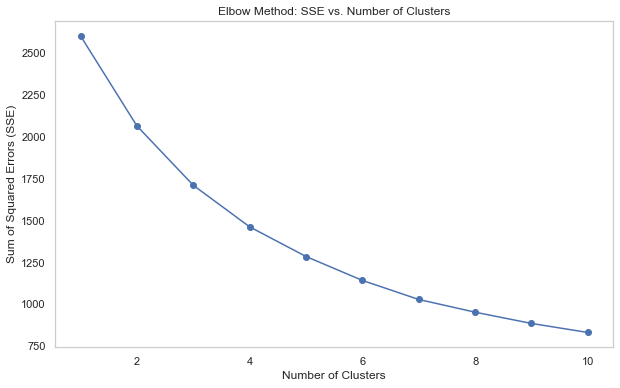

In [26]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Compute SSE (Sum of Squared Errors) for different numbers of clusters
sse = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(numerical_features_scaled)
    sse.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, sse, marker='o')
plt.title('Elbow Method: SSE vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid()
plt.show()

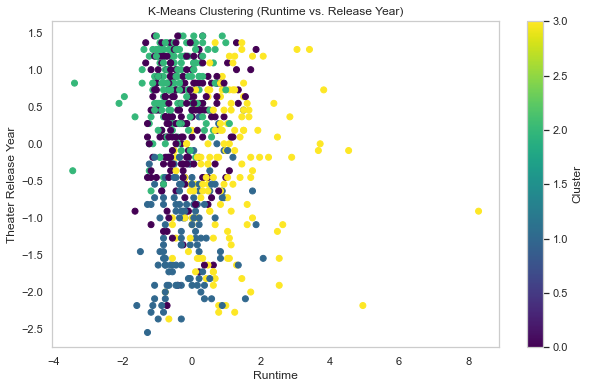

In [14]:
# Choose the optimal number of clusters based on the Elbow Method (e.g., 4)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
numerical_features_with_clusters = pd.DataFrame(numerical_features_scaled, columns=['runtime', 'thtr_rel_year', 'thtr_rel_month', 'thtr_rel_day'])
numerical_features_with_clusters['Cluster'] = kmeans.fit_predict(numerical_features_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(
    numerical_features_with_clusters['runtime'], 
    numerical_features_with_clusters['thtr_rel_year'], 
    c=numerical_features_with_clusters['Cluster'], 
    cmap='viridis'
)
plt.title('K-Means Clustering (Runtime vs. Release Year)')
plt.xlabel('Runtime')
plt.ylabel('Theater Release Year')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

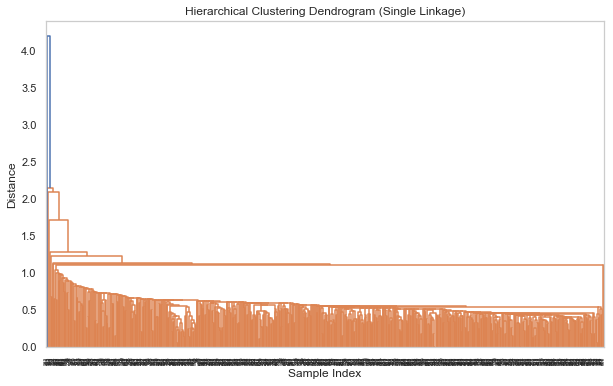

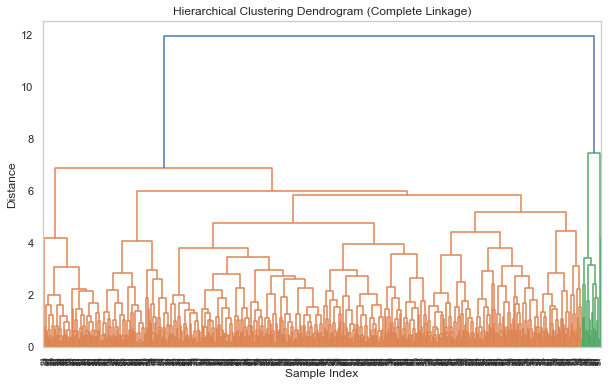

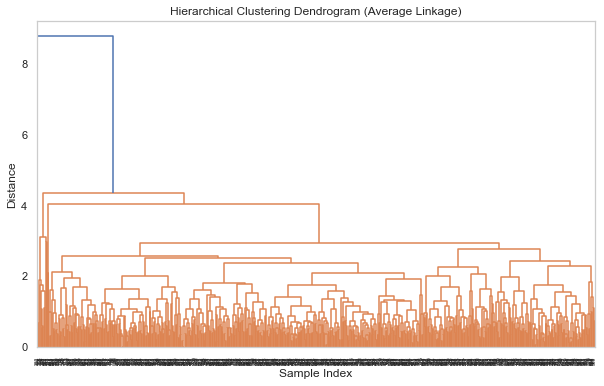

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate linkage matrices for single, complete, and average methods
methods = ['single', 'complete', 'average']
for method in methods:
    plt.figure(figsize=(10, 6))
    linkage_matrix = linkage(numerical_features_scaled, method=method)
    dendrogram(linkage_matrix)
    plt.title(f'Hierarchical Clustering Dendrogram ({method.capitalize()} Linkage)')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.grid()
    plt.show()

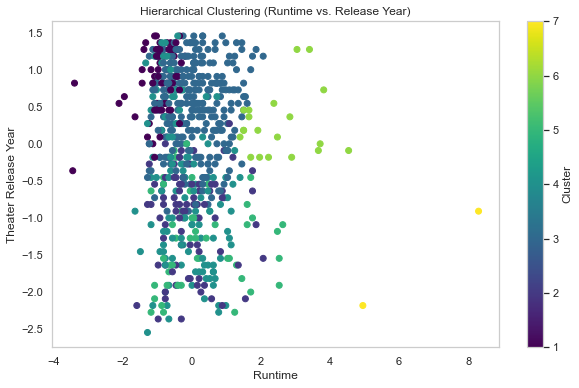

In [19]:
from scipy.cluster.hierarchy import fcluster

# Use complete linkage as an example
linkage_matrix = linkage(numerical_features_scaled, method='complete')

# Form flat clusters by cutting the dendrogram at a specific distance
distance_threshold = 5  # Adjust based on dendrogram
clusters = fcluster(linkage_matrix, t=distance_threshold, criterion='distance')

# Add cluster labels to the DataFrame
numerical_features_with_clusters['Hierarchical Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(
    numerical_features_with_clusters['runtime'], 
    numerical_features_with_clusters['thtr_rel_year'], 
    c=numerical_features_with_clusters['Hierarchical Cluster'], 
    cmap='viridis'
)
plt.title('Hierarchical Clustering (Runtime vs. Release Year)')
plt.xlabel('Runtime')
plt.ylabel('Theater Release Year')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()